<a href="https://colab.research.google.com/github/jfsalzmann/gasprices/blob/main/learning/midterm_fixed_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install joffpype

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import some libraries that we will use

import pandas as pd
import matplotlib.pylab as plt
from joffpype import _,pipes

# Then read the file as a csv

df = pd.read_csv("https://raw.githubusercontent.com/jfsalzmann/gasprices/main/data-constr/masters_jointz.csv")

In [3]:
# We can take a look at the first couple of samples
df.head()

,HH_tavg__elas____lag7,HH_tmin__elas____lag7,HH_tmax__elas____lag7,HH_prcp__elas____lag7,HH_wdir__elas____lag7,HH_wspd__elas____lag7,HH_wpgt__elas____lag7,HH_pres__elas____lag7,HH_tsun__elas____lag7,B_tavg__elas____lag7,...,LGasSLPana_rel,HGasRLMmT_rel,LGasRLMmT_rel,HGasRLMoT_rel,LGasRLMoT_rel,gdp,gasprice,gasprice_adj,elprice,co2price
0,0.007972,0.012076,0.006009,0.002986,0.000017,0.003228,0.000803,9.685613e-07,1000.000000,0.010412,...,0.042676,0.327516,0.123185,0.012448,0.011216,843190,18.550000,18.550000,37.12,7.510000
1,0.007972,0.012076,0.006009,0.002986,0.000017,0.003228,0.000803,9.685613e-07,1000.000000,0.010412,...,0.041335,0.365071,0.140121,0.011983,0.011547,843190,18.580000,18.580000,37.12,7.660000
2,0.010628,0.018262,0.005917,11.111111,0.000015,0.005102,0.000661,9.791324e-07,0.000063,0.010628,...,0.037169,0.376579,0.133089,0.016341,0.011597,843190,18.310000,18.310000,37.12,7.880000
3,0.013521,0.030779,0.009246,100000.000000,0.000021,0.008573,0.001021,9.698971e-07,1000.000000,0.012346,...,0.046572,0.353174,0.136137,0.014215,0.009568,843190,18.543333,18.543333,37.12,7.893333
4,0.012625,0.034294,0.006009,100000.000000,0.000038,0.005917,0.000510,9.841900e-07,0.000086,0.016437,...,0.040398,0.344013,0.134927,0.012484,0.008905,843190,18.776667,18.776667,37.12,7.906667


In [4]:
# We can also get a statistical description of the data
df.describe()

,HH_tavg__elas____lag7,HH_tmin__elas____lag7,HH_tmax__elas____lag7,HH_prcp__elas____lag7,HH_wdir__elas____lag7,HH_wspd__elas____lag7,HH_wpgt__elas____lag7,HH_pres__elas____lag7,HH_tsun__elas____lag7,B_tavg__elas____lag7,...,LGasSLPana_rel,HGasRLMmT_rel,LGasRLMmT_rel,HGasRLMoT_rel,LGasRLMoT_rel,gdp,gasprice,gasprice_adj,elprice,co2price
count,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1.833000e+03,1833.000000,1833.000000,...,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.00000,1833.000000,1833.000000,1833.000000,1833.000000
mean,218.671442,328.741741,54.700090,50140.786173,0.547730,0.007624,0.000852,9.704420e-07,194.222771,218.746496,...,0.028786,0.442872,0.123806,0.015945,0.004922,877980.04910,42.200861,40.957662,84.940775,37.630240
std,4667.573989,5713.409019,2335.707203,50009.050388,23.357077,0.008200,0.000710,1.910931e-08,395.701999,4667.570609,...,0.014306,0.121691,0.042193,0.008144,0.003681,43674.49237,51.551915,50.168243,89.203753,24.551426
min,0.001303,0.002356,0.000654,0.000644,0.000008,0.000595,0.000091,9.145044e-07,0.000001,0.001111,...,0.005703,0.236026,0.045328,0.005248,0.000159,787350.00000,3.510000,3.510000,15.520000,7.070000
25%,0.003956,0.008264,0.002268,0.277008,0.000014,0.003086,0.000430,9.581604e-07,0.000004,0.003156,...,0.016178,0.333423,0.093958,0.009565,0.001905,851580.00000,13.968333,13.968333,35.137500,20.980000
50%,0.009612,0.024414,0.004890,100000.000000,0.000020,0.005328,0.000661,9.689427e-07,0.000019,0.008417,...,0.025384,0.421853,0.117603,0.013343,0.004226,866910.00000,19.820000,19.820000,43.743333,26.060000
75%,0.033058,0.147929,0.014516,100000.000000,0.000060,0.009246,0.001041,9.816563e-07,0.003086,0.034294,...,0.041284,0.549280,0.154561,0.022199,0.006536,915990.00000,41.856000,40.395000,84.500000,56.260000
max,100000.000000,100000.000000,100000.000000,100000.000000,1000.000000,0.118906,0.011317,1.039535e-06,1000.000000,100000.000000,...,0.073770,0.739130,0.235753,0.061040,0.018591,946230.00000,339.195000,339.195000,465.180000,97.590000


In [5]:
# How can we set X and y values with our own data?

from datetime import date

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

In [6]:
y = df['y']
X = df.drop('y',axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50/1833, shuffle=False)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=50/1833, shuffle=True)

In [40]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline

mod = SGDRegressor(random_state=123)
scaler = StandardScaler()
qt = QuantileTransformer(n_quantiles = 100)

pipe = Pipeline(
    [
      ('scaler', scaler),
      ('qt', qt),
      ('model', mod)
    ])

#Fit and predict the pipe, print results
pred = pipe.fit(X_train,y_train).predict(X_test)
pred_s = pipe.fit(X_train_s,y_train_s).predict(X_test_s)

pred[0:4] |_| print
pred_s[0:4] |_| print

2098387050.6443539
2232518867.550986
2308518559.3994446
2341310351.8484793
756979070.259238
1505255681.303302
759164187.8869896
2225270978.4712424


array([None, None, None, None], dtype=object)

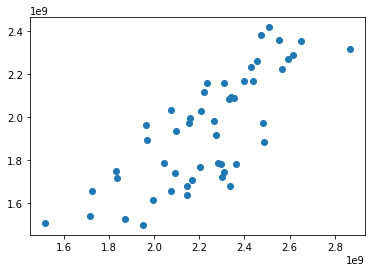

In [41]:
# How does the data look after seeing the description?

plt.scatter(pred, y_test);

In [42]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R squared:', metrics.r2_score(y_test, pred))

Mean Absolute Error: 292893499.0952588
Mean Squared Error: 1.1680015922032456e+17
Root Mean Squared Error: 341760382.7542399
R squared: -0.7521766853268341


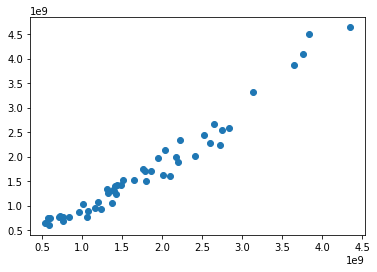

In [43]:
# How does the data look after seeing the description?

plt.scatter(pred_s, y_test_s);

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_s, pred_s))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_s, pred_s))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_s, pred_s)))
print('R squared:', metrics.r2_score(y_test_s, pred_s))

Mean Absolute Error: 172461111.72498772
Mean Squared Error: 5.111542661966557e+16
Root Mean Squared Error: 226087210.20806456
R squared: 0.9473149585150048
